In [150]:
# Import libraries
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [151]:
# load dataset 
df = pd.read_csv("./advertising.csv")

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [153]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Sales')

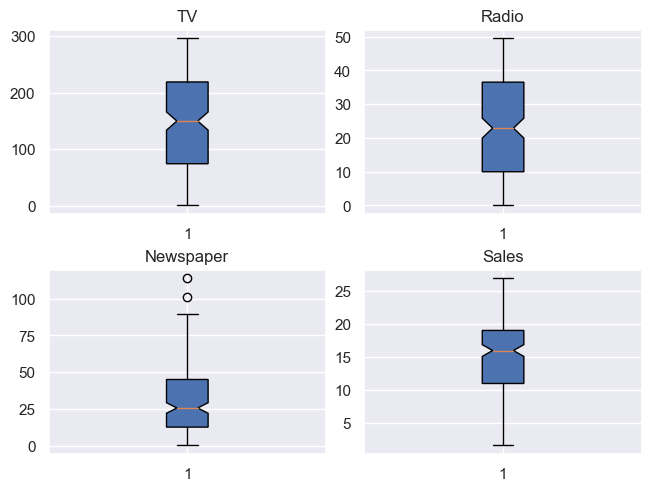

In [154]:
sns.set_theme()
fig, axs = plt.subplots(ncols=2,nrows= 2, layout='constrained')

# rectangular box plot
bplot1 = axs[0,0].boxplot(df["TV"],
                    notch=True,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
axs[0,0].set_title('TV')

# notch shape box plot
bplot2 = axs[0,1].boxplot(df["Radio"],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
axs[0,1].set_title('Radio')

# notch shape box plot
bplot2 = axs[1,0].boxplot(df["Newspaper"],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
axs[1,0].set_title('Newspaper')

# notch shape box plot
bplot2 = axs[1,1].boxplot(df["Sales"],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
axs[1,1].set_title('Sales')

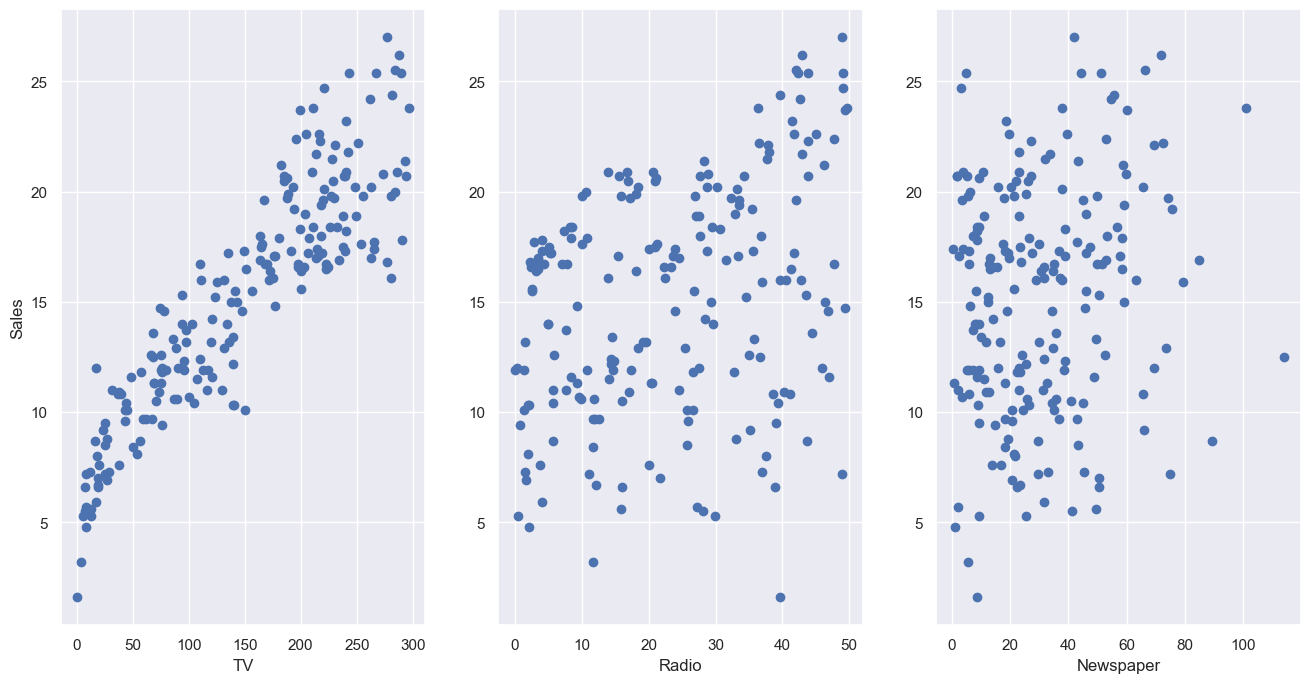

In [155]:
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 3, 1)
plt.scatter(x=df["TV"], y=df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.subplot(1, 3, 2)
plt.scatter(x=df["Radio"],y=df["Sales"])
plt.xlabel("Radio")

plt.subplot(1, 3, 3)
plt.scatter(x=df["Newspaper"],y=df["Sales"])
plt.xlabel("Newspaper")

plt.show()

<Axes: >

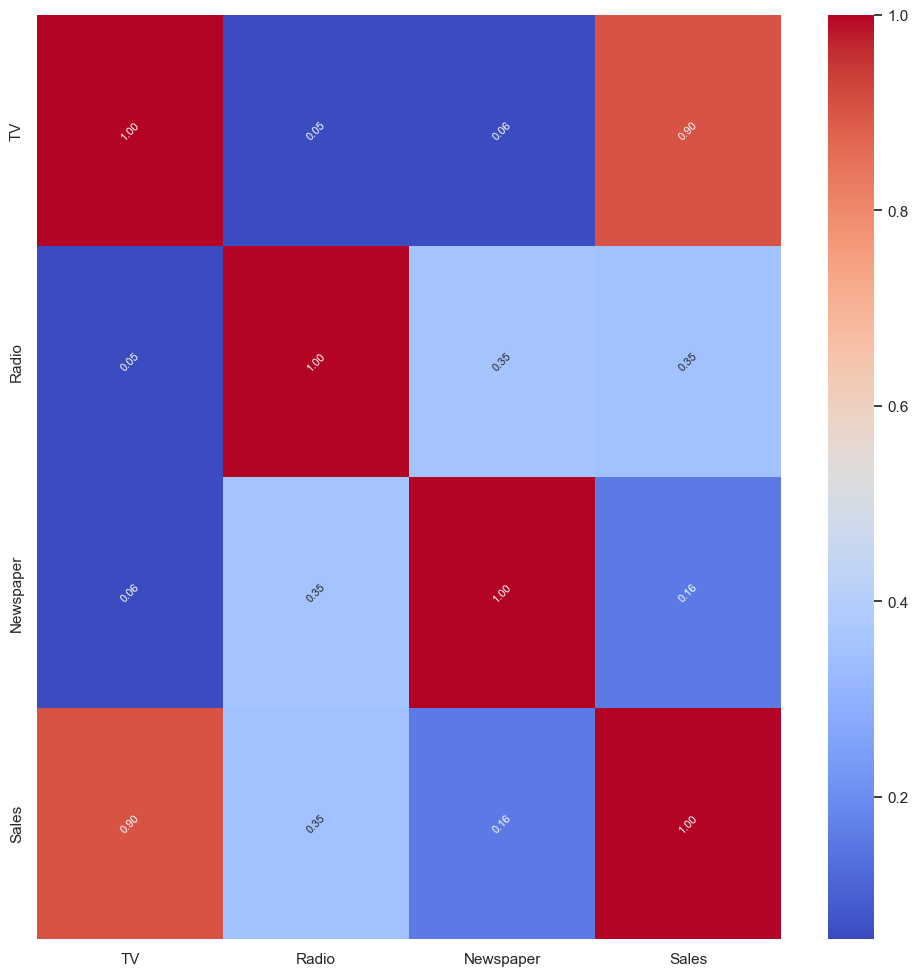

In [156]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 45}, ax=ax)


In [157]:
X = df.drop(["Sales","Newspaper"],axis=1)
y = df.Sales
print(X.shape)
print(y.shape)


(200, 2)
(200,)


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [159]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Create a linear regression model
model = LinearRegression()


In [161]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [162]:
# Use the trained model to predict sales for new data
y_pred = model.predict(X_test)

In [163]:
# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [164]:
# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Absolute Error (MAE): 1.2670422434730482
Mean Squared Error (MSE): 2.846616122131541
Root Mean Squared Error (RMSE): 1.6871917858179433
R-squared (R^2) Score: 0.9078797802624651


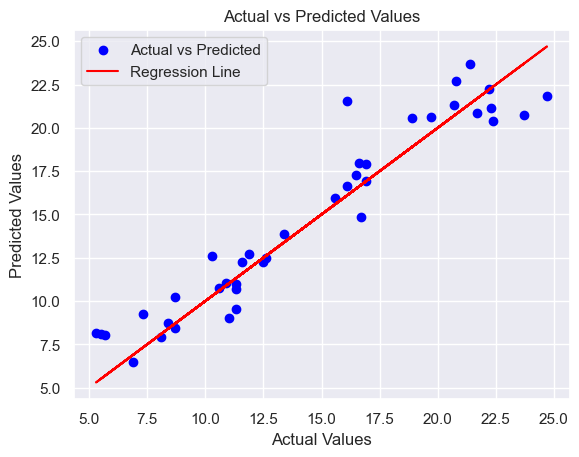

In [165]:
# Plotting the scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Adding the regression line
plt.plot(y_test, y_test, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
